# **Analyzing the Impact of Parental Education Level and Pre-Test Courses on Student Exam Results**

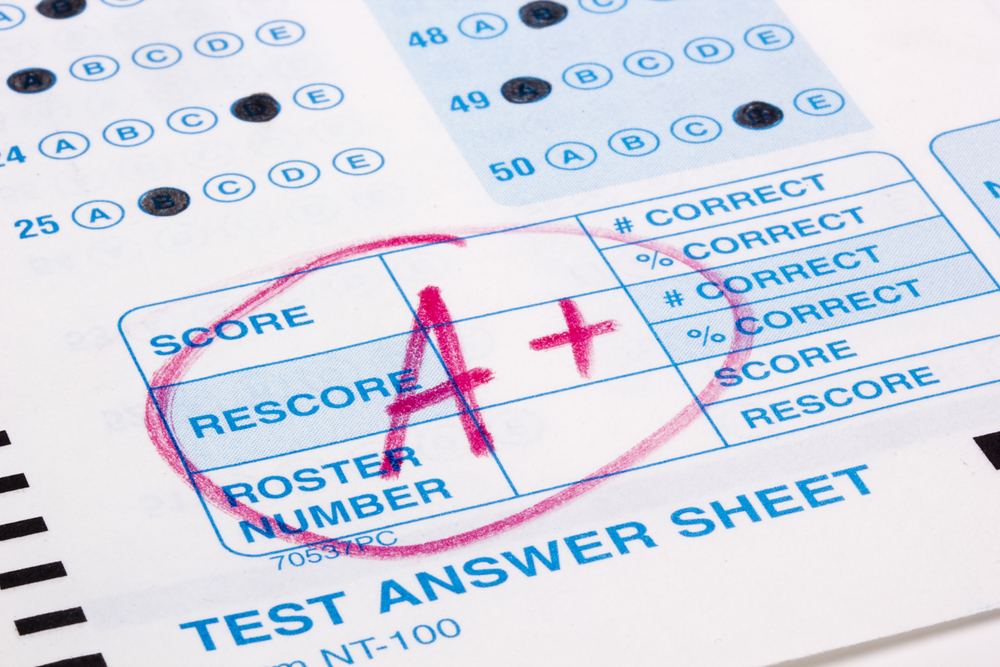

##**Introduction**

An education has an important role in shaping a person to be good then before. Through education, a person can acquire the knowledge, skills, and values necessary to succeed in life. One example of carrying out the educational process is through schools. In its implementation, schools are inevitably involved in the use of examinations. Exams have an important role in measuring understanding and mastery of the material that has been taught from teacher to student. This explanation has motivated me to carry out this project to analyze student exam results. Because exam results play a very important role in improving the quality of education and measuring students achievements in the teaching and learning process.

##**Data Understanding**

In this project, I am using a dataset from Kaggle that contains historical exam scores of students based on their group, parental education, and exam courses. The dataset consists of 1000 student records described by eight variable columns:


1. Gender → sex of students
2. Race/ethnicity → ethnicity of students
3. Parental level of education → parents final education
4. Lunch → type of food obtained before taking the exam
5. Test preparation course → complete or not complete taking pre-test
6. Math score → math exam score result
7. Reading score → reading exam score result
8. Writing score → writing exam score result

##**Objective**

In this project, I am tasked with analyzing exam results to provide insights that can be used to improve students’ grades, especially those below average. The goal is to ensure better exam results in the future. Here are some of the questions I’ve come up with:
1. Finding the distribution of student exam scores
2. Which groups have the highest average exam scores?
3. Does a test preparation course lead to better exam results for students?
4. Based on the average exam scores, which are not yet optimal?

##**Data Preparation**
The first step in preparation is to mount to connect the notebook to the file where the dataset is stored

In [ ]:
# Mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After successfully mounting, we can proceed to locate the folder where the dataset file is located

In [3]:
# Finding file location
folder = 'drive/MyDrive/Dataset Latihan/Students Performance in Exams'

After locating the file, we can directly import it into the notebook and also import the Pandas library for data inspection, cleaning, manipulation, outlier inspection, and use for exploration & gaining insight

In [4]:
# Import dataset and library
import pandas as pd
table = pd.read_csv (folder+'/StudentsPerformance.csv')

In [5]:
table.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## **Data inspection**
During inspection, I checked the data types, null values, and duplicate values to ensure accurate data.

In [6]:
# Data info
table.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# Data type checking
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Null data checking
table.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [9]:
# Duplicate checking
table.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool



*   From the dataset check performed, it is known that this dataset consists of five object data types and 3 integer data types.
*   In the second part, we can see that the number of data values in this dataset consists of 1000 student exam results, including Math Score, Reading Score, and Writing Score
* From the checking results, it can be concluded that this dataset does not have null and duplicated values. Therefore, this process can proceed to the next stage.




##**Data manipulation**
In this process, I made some minor manipulations because there were several header titles that caused ambiguity

In [10]:
# Changing variabel name and structure
table = table.rename(columns = {'gender':'Gender',
                                'race/ethnicity':'Group Name',
                                'parental level of education':'Parental Level of Education',
                                'lunch':'Lunch',
                                'test preparation course':'Test Preparation Course',
                                'math score':'Math Score',
                                'reading score':'Reading Score',
                                'writing score':'Writing Score'})



*   Changed race/ethnicity to Group Name because the dataset source does not provide more detailed information about race/ethnicity groups. Therefore, if not changed, it might lead to misunderstanding for readers.
*   Changing the sentence structure to start with a capital letter for a neater and more easily recognizable format by readers.


In [11]:
table.head(10)

,Gender,Group Name,Parental Level of Education,Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


##**Handling outliers**
In this step, I only analyzed outliers in the scores of each subject tested, because the scores of each subject are objects that I will analyze later. The variables I analyzed were Math Score, Reading Score, and Writing Score.

In [12]:
# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Understanding information about the Math Score variable
table['Math Score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: Math Score, dtype: float64

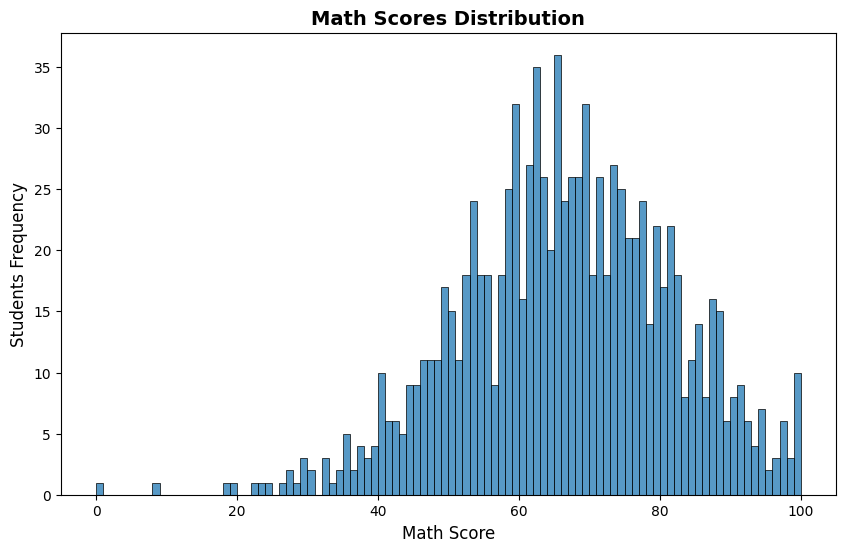

In [14]:
# Show visualization for Math Score Distribution
fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(data = table,
            x = 'Math Score',
            bins = 100,
            ax = ax)

ax.set_xlabel('Math Score', fontsize=12)
ax.set_ylabel('Students Frequency', fontsize=12)
ax.set_title('Math Scores Distribution', fontsize=14, fontweight='bold')

plt.show()

From the visualization above, we can see that the distribution of Math Scores is relatively normal. Although there are some outliers below the first quartile, this is not a concern because the frequency of these outlier values is below 5 (≤5).

In [15]:
# Understanding information about the Reading Score variable
table['Reading Score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: Reading Score, dtype: float64

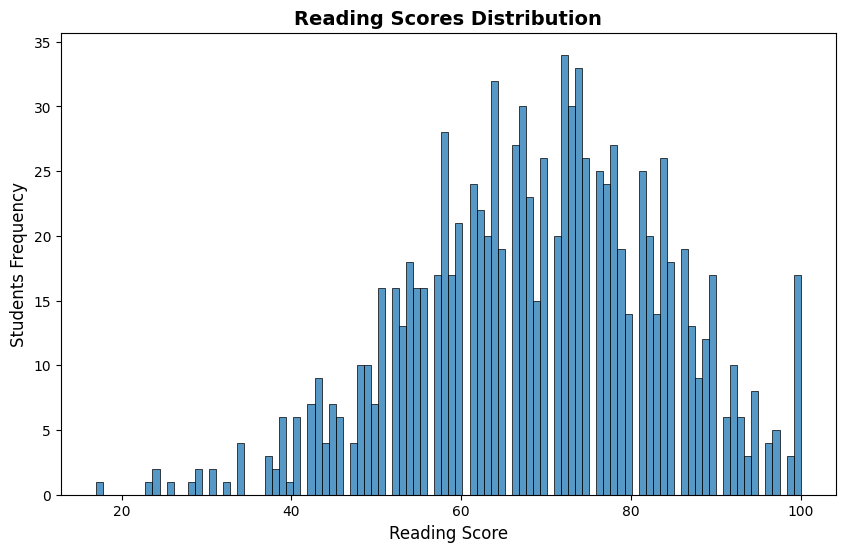

In [16]:
# Data visualization for Reading Scores Distribution
fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(data = table,
            x = 'Reading Score',
            bins = 100,
            ax = ax)

ax.set_xlabel('Reading Score', fontsize=12)
ax.set_ylabel('Students Frequency', fontsize=12)
ax.set_title('Reading Scores Distribution', fontsize=14, fontweight='bold')


plt.show()

In the visualization, we can see that the distribution of Reading scores is also relatively normal because no value exceeds the mean of the data.

In [17]:
# Understanding information about the Writing Score variable
table['Writing Score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: Writing Score, dtype: float64

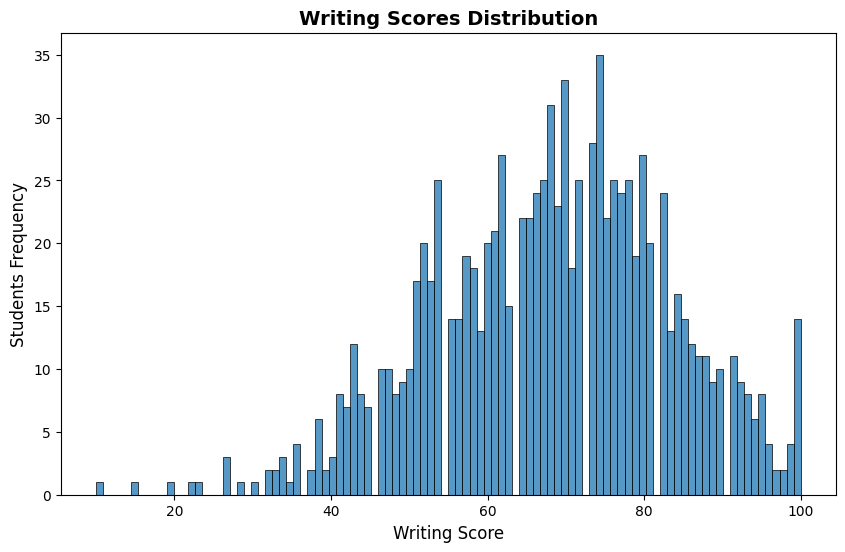

In [18]:
# Data visualization for Writing Score distribution
fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(data = table,
            x = 'Writing Score',
            bins = 100,
            ax = ax)

ax.set_xlabel('Writing Score', fontsize=12)
ax.set_ylabel('Students Frequency', fontsize=12)
ax.set_title('Writing Scores Distribution', fontsize=14, fontweight='bold')

plt.show()

From the image, it can be concluded that the histogram generated is normally distributed. This can be seen from the information provided on the left side of the image where the overall distribution of values from the minimum score (10) to the maximum score (100) does not show any suspicious frequency counts for a subject score.

##**Exploration & Insight**
Before proceeding with the exploration, I need to calculate the average scores for all exam subjects score. This is done to provide readers with a more comprehensive insight into the visualization of the data.

In [19]:
# Menambahkan kolom baru dengan nama 'Average for Overall Score'
table = table.assign(**{'Average for Overall Score':(table['Math Score'] + table['Reading Score'] + table['Writing Score']) / 3})

#Membulatkan 2 angka di belakang koma
table['Average for Overall Score'] = round(table['Average for Overall Score'], 2)

In [20]:
table.head(10)

,Gender,Group Name,Parental Level of Education,Lunch,Test Preparation Course,Math Score,Reading Score,Writing Score,Average for Overall Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
5,female,group B,associate's degree,standard,none,71,83,78,77.33
6,female,group B,some college,standard,completed,88,95,92,91.67
7,male,group B,some college,free/reduced,none,40,43,39,40.67
8,male,group D,high school,free/reduced,completed,64,64,67,65.00
9,female,group B,high school,free/reduced,none,38,60,50,49.33


## **1. Finding the distribution of student exam scores**

In [21]:
# Assigning grades to the grades according to the following criteria :
'''
A: 90-100 (Excellent)
B: 80-89 (Good)
C: 70-79 (Fair)
D: 60-69 (Poor)
E: 0-59 (Fail)
'''

def sign_grade(row):
    percentage = row['Average for Overall Score']
    status = row['Test Preparation Course']
    if percentage >= 90:
        return 'A'
    elif percentage >= 80:
        return 'B'
    elif percentage >= 70:
        return 'C'
    elif percentage >= 60:
        return 'D'
    else:
        return 'E'

table['grades'] = table.apply(sign_grade, axis=1)

table['grades'].value_counts()

E    285
C    261
D    256
B    146
A     52
Name: grades, dtype: int64

<ipython-input-22-4cea322cc1f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=sizes, palette='deep')


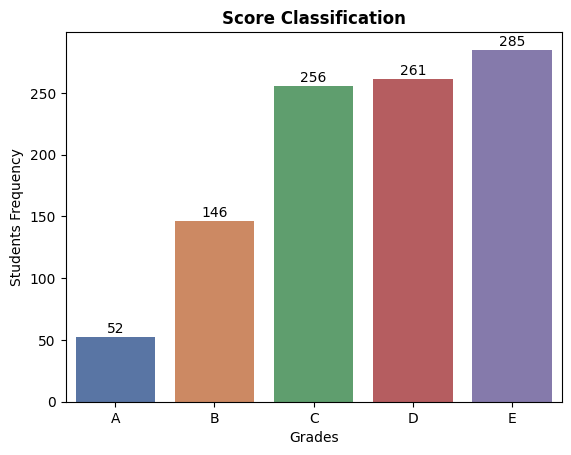

In [22]:
# Data visualization for Score Classification
labels = ['A', 'B', 'C', 'D', 'E']
sizes = [52, 146, 256, 261, 285]

ax = sns.barplot(x=labels, y=sizes, palette='deep')

for i in range(len(sizes)):
    ax.text(i, sizes[i] + 1, sizes[i], ha='center', va='bottom')

plt.xlabel('Grades')
plt.ylabel('Students Frequency')
plt.title('Score Classification', color='black', fontweight='bold')

plt.show()

Key highlight:

*   Out of 1000 students who took the test, only 454 students scored above average (min score = ≥70)
*   For the classification of good grades, only 52 students have an average score of grade A, while grade B is only possessed by 146 students
* Grade C classified as Fair is obtained by 256 students. Meanwhile, the classification of poor grades is supported by grade D with 261 students and grade F with 285 students



After we have determined the distribution count based on the criteria, we can further analyze by knowing the overall grade point average and each subject’s grade point average

In [23]:
# Finding GPA score (Overall, Math, Writing, Reading)

##Calcualtion
mean = table['Average for Overall Score'].mean()  # For overall
mean_ms = table['Math Score'].mean()  #For math
mean_rs = table['Reading Score'].mean()  #For reading
mean_ws = table['Writing Score'].mean()  #For writing

print("Overall GPA score =", mean)
print("GPA math =", mean_ms)
print("GPA reading =", mean_rs)
print("GPA writing =", mean_ws)

Overall GPA score = 67.77057999999998
GPA math = 66.089
GPA reading = 69.169
GPA writing = 68.054


<ipython-input-24-95ac42b7df0e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=sizes, palette=colors)


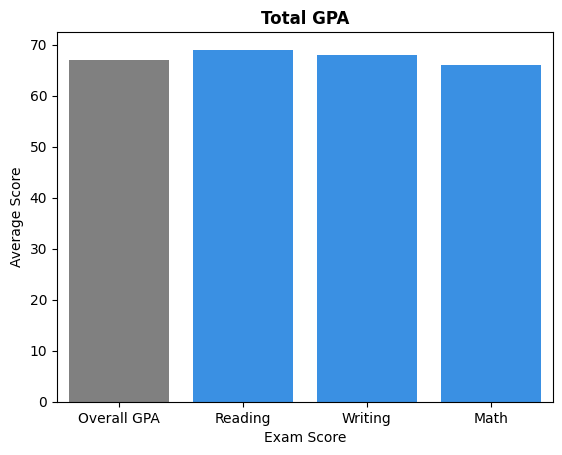

In [24]:
# Data visualization for GPA Score
labels = ['Overall GPA','Reading','Writing','Math']
sizes = [67,69, 68, 66]

colors = ['grey', 'dodgerblue', 'dodgerblue', 'dodgerblue']

ax = sns.barplot(x=labels, y=sizes, palette=colors)

plt.xlabel('Exam Score')
plt.ylabel('Average Score')
plt.title('Total GPA', color='black', fontweight='bold')

plt.show()

Key highlight:


*   From the calculation results, the overall GPA for all exams only obtained an average score of 67
*   The reason for the GPA score being far from expectations is that the Reading, Writing, and Math scores exam have average scores ranging from 66 to 69 points



Next, we can analyze the Proficiency Rate to determine the percentage of students who pass with a score of ≥70 for overall and in each exam

In [25]:
#Finding proficiency rate

## Calculate the number of students who passed with a score of >= 70
num_passing_overall = len(table[table['Average for Overall Score'] >= 70])
num_passing_math = len(table[table['Math Score'] >= 70])
num_passing_reading = len(table[table['Reading Score'] >= 70])
num_passing_writing = len(table[table['Writing Score'] >= 70])

## Total of student
total_students = len(table)

## Calculation for proficency rate
proficiency_rate_overall = (num_passing_overall / total_students) * 100
proficiency_rate_math = (num_passing_math / total_students) * 100
proficiency_rate_reading = (num_passing_reading / total_students) * 100
proficiency_rate_writing = (num_passing_writing / total_students) * 100

print(f"Proficiency rate for Overall Score: {proficiency_rate_overall:.2f}%")
print(f"Proficiency rate for Math Score: {proficiency_rate_math:.2f}%")
print(f"Proficiency rate for Reading Score: {proficiency_rate_reading:.2f}%")
print(f"Proficiency rate for Writing Score: {proficiency_rate_writing:.2f}%")

Proficiency rate for Overall Score: 45.90%
Proficiency rate for Math Score: 40.90%
Proficiency rate for Reading Score: 51.30%
Proficiency rate for Writing Score: 48.90%


<ipython-input-26-fc1a87b954df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y=sizes, palette=colors)


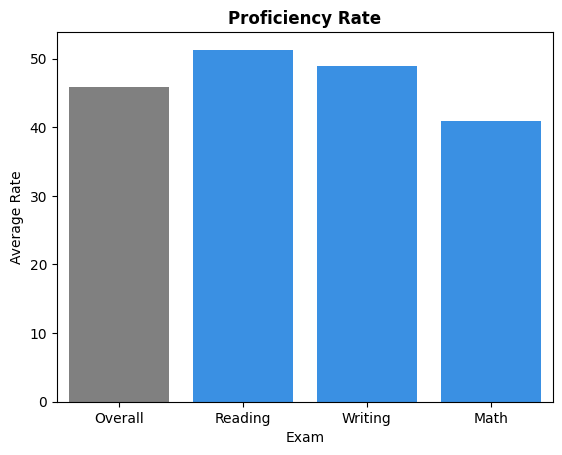

In [26]:
#Visualization for proficiency rate
labels = ['Overall','Reading','Writing','Math']
sizes = [45.90,51.30,48.90,40.90]

colors = ['grey', 'dodgerblue', 'dodgerblue', 'dodgerblue']

ax=sns.barplot(x=labels, y=sizes, palette=colors)

plt.xlabel('Exam')
plt.ylabel('Average Rate')
plt.title('Proficiency Rate', color='black', fontweight='bold')

plt.show()

Key highlight:


*   From the calculations, it can be seen that only the Reading Score achieved a proficiency rate above 50%. In addition, Writing only contributed 48.9% and the Math Score had the worst pass rate at 40.9%
*   From these three subjects when combined, it only contribute to a pass rate of 45.9%



We also can see the detailed number of students who passed the exam with a score of ≥70

In [27]:
#Finding passing student amount (proficiency)

# Filter table untuk for exam score
math_pass_count = len(table[table['Math Score'] >= 70])
reading_pass_count = len(table[table['Reading Score'] >= 70])
writing_pass_count = len(table[table['Writing Score'] >= 70])
overall_pass_count = len(table[table['Average for Overall Score'] >= 70])


print("Student passing for Overall Score:", overall_pass_count)
print("Student passing for Reading Score:", reading_pass_count)
print("Student passing for Writing Score:", writing_pass_count)
print("Student passing for Math Score:", math_pass_count)

Student passing for Overall Score: 459
Student passing for Reading Score: 513
Student passing for Writing Score: 489
Student passing for Math Score: 409


<ipython-input-28-a627fd97e5d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y=sizes, palette=colors)


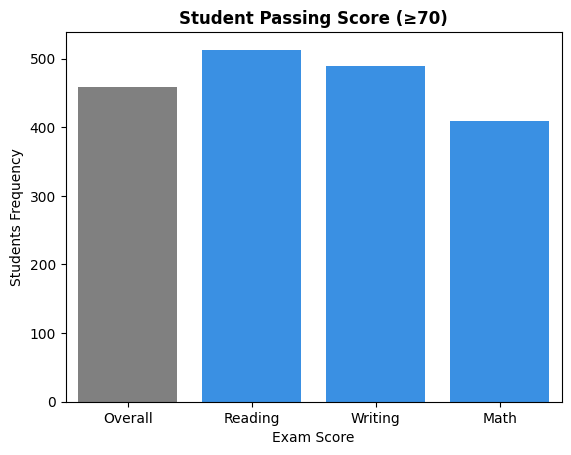

In [28]:
#Visualization for passing student amount
labels = ['Overall','Reading','Writing','Math']
sizes = [459,513,489,409]

ax=sns.barplot(x=labels, y=sizes, palette=colors)

colors = ['grey', 'dodgerblue', 'dodgerblue', 'dodgerblue']

plt.xlabel('Exam Score')
plt.ylabel('Students Frequency')
plt.title('Student Passing Score (≥70)', color='black', fontweight='bold')
plt.show()

Key highlight:


*   Reading is the subject with the highest number of students passing compared to the other two subjects, with a total of 513 students passing
*   Peringkat kedua ditempati oleh Writing dengan jumlah sebanyak 489 siswa dan peringkat terakhir Math memiliki jumlah kelulusan yang paling sedikit yaitu sebanyak 409 siswa saja
* If these three subjects are added up, then the number of participants who passed was only 459 students out of 1000 students who took the exam



##**2. Which groups have the highest average exam scores?**
To view the highest exam scores, we can observe them based on each group.

In [29]:
# Calculate the average score per group
avg_group_score = table.groupby('Group Name')['Average for Overall Score'].mean().sort_values(ascending=False)

for group, avg_score in avg_group_score.items():
    print(f"Average {group} = {avg_score:.2f}")


Average group E = 72.75
Average group D = 69.18
Average group C = 67.13
Average group B = 65.47
Average group A = 62.99


<ipython-input-30-63542437181e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y=sizes, palette='viridis')


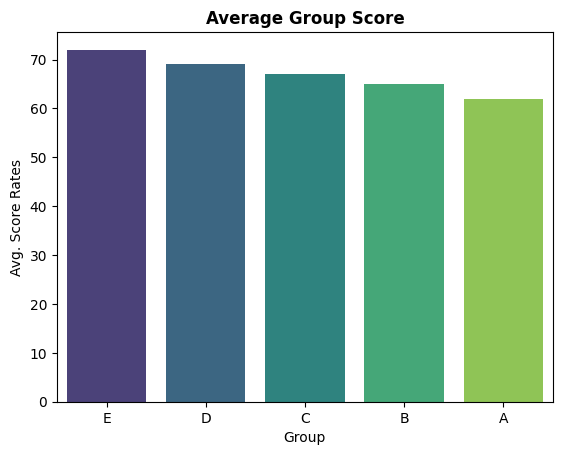

In [30]:
#Visualization for AVG Group Score
labels = ['E','D','C','B','A']
sizes = [72,69,67,65,62]

ax=sns.barplot(x=labels, y=sizes, palette='viridis')

plt.xlabel('Group')
plt.ylabel('Avg. Score Rates')
plt.title('Average Group Score', color='black', fontweight='black')
plt.show()

Key highlight:


*   Group E has the highest overall exam score with an average of 72. This is followed by Group D in second place with an average score of 69
*   Group A ranks last as it has the smallest average score of 62



Next, we can analyze the average group rate to determine the highest average score based on the parents’ educational background

In [31]:
# Calculating AVG Score by Parental Background
max_score = table['Average for Overall Score'].max()
min_score = table['Average for Overall Score'].min()

avg_overall_score = table.groupby('Parental Level of Education')['Average for Overall Score'].mean().sort_values(ascending=False)
for group, avg_score in avg_overall_score.items():
    percentage = (avg_score - min_score) / (max_score - min_score) * 100
    print(f"{group} = {percentage:.2f}%")

master's degree = 70.99%
bachelor's degree = 69.15%
associate's degree = 66.56%
some college = 65.36%
some high school = 61.66%
high school = 59.45%


<ipython-input-32-491d3c78c9f6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=sizes, palette=colors)


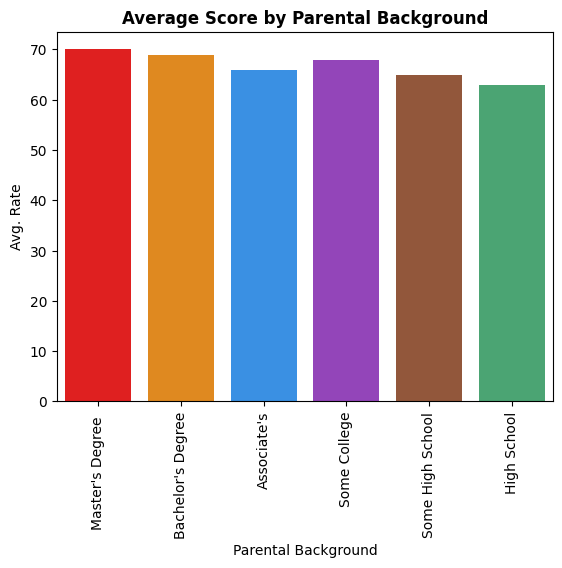

In [32]:
# Data visualization for AVG Score by Parental Background
labels = ["Master's Degree ","Bachelor's Degree","Associate's","Some College","Some High School","High School"]
sizes = [70,69,66,68,65,63]

colors = ['red', 'darkorange', 'dodgerblue', 'darkorchid','sienna','mediumseagreen']

ax = sns.barplot(x=labels, y=sizes, palette=colors)

plt.xticks(rotation=90)

plt.xlabel('Parental Background')
plt.ylabel('Avg. Rate')
plt.title('Average Score by Parental Background', color='black', fontweight='bold')

plt.show()

Key highlight:


*   The visualization results show that all six charts have stable values ranging from 63% to 70%
*   Master’s degree has the highest rate at 70%. Meanwhile, the lowest is High School with a percentage of 63%



From the results, we can also see the composition of each group based on the last parental education status. The function of this analysis is to determine the influence of parental education on exam scores.

Text(0.5, 1.0, 'Parental Education Distribution')

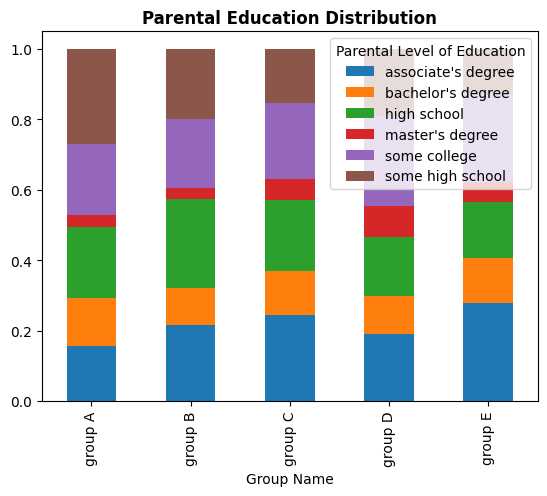

In [33]:
#Mengetahui distribusi tiap kelompok berdasarkan parent education
stacked_chart = pd.crosstab(table['Group Name'],
                              table['Parental Level of Education'])

stacked_chart.div(stacked_chart.sum(1).astype(float), axis=0).plot(kind='bar', stacked = 'True, figsize=(7,4)')

# Menambahkan judul pada chart
plt.title('Parental Education Distribution', color='black', fontweight='bold')

Key highlight:


*   From the visualization above, it can be seen that the Master’s degree has the smallest composition portion among all groups. Additionally, the Bachelor’s degree is the second smallest composition portion after the Master’s degree
*   Associate’s degree, Some College, Some High School, and High School have the largest composition portions in groups A, B, C, D, and E.
* From the visualization, it can also be concluded that students with parents background of master’s and bachelor’s degrees although they have a small composition percentage, but they are able to outperform other parental education backgrounds.



##**3. Does a test preparation course lead to better exam results for students?**

In [34]:
#Comparison between Test Preparation Course and Average for Overall Score

score_up = table[table['Average for Overall Score'] >= 70].groupby('Test Preparation Course').size()
score_down = table[table['Average for Overall Score'] < 70].groupby('Test Preparation Course').size()

total_prep = 1000
percentage_up = (score_up / total_prep) * 100
percentage_down = (score_down / total_prep) * 100

print("SCORE UP TO 70")
print(percentage_up)

print("="*50)

print("SCORE UNDER 70")
print(percentage_down)

SCORE UP TO 70
Test Preparation Course
completed    21.8
none         24.1
dtype: float64
SCORE UNDER 70
Test Preparation Course
completed    14.0
none         40.1
dtype: float64


<ipython-input-35-d1f45cce7ce6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y=sizes, palette='viridis')


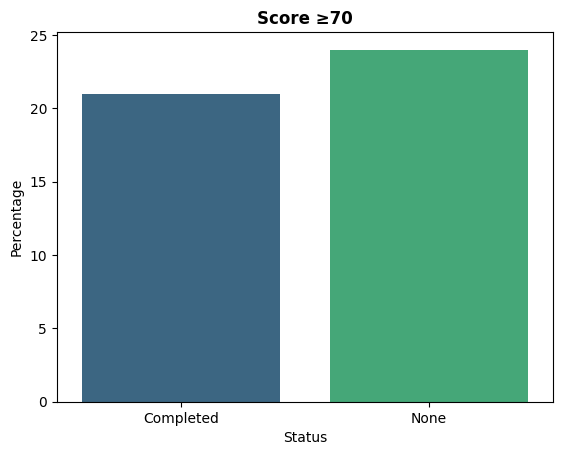

In [35]:
#Visualization
labels = ["Completed","None"]
sizes = [21,24]

# Create a bar plot
ax=sns.barplot(x=labels, y=sizes, palette='viridis')

plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Score ≥70', color='black', fontweight='bold')
plt.show()

<ipython-input-36-03e0220c7e8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y=sizes, palette='viridis')


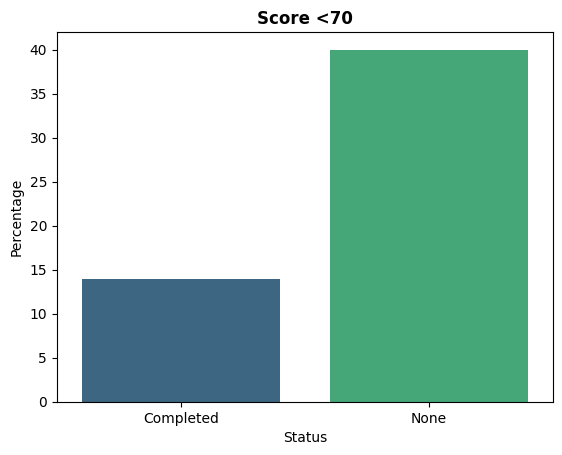

In [36]:
#Visualization
labels = ["Completed","None"]
sizes = [14,40]

# Create a bar plot
ax=sns.barplot(x=labels, y=sizes, palette='viridis')

plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Score <70', color='black', fontweight='bold')
plt.show()

Key highlight:


*   When we look at the average score results of ≥70, it shows that students who took the preparation test have a lower percentage compared to students who did not take the preparation test.
*   While in the visualization of the percentage of students who scored <70, it shows that students who took the preparation test have a low percentage of 14% compared to students who did not take the preparation test, which is 40%.
* From two previous highlights, it can be concluded that the test preparation course does not significantly affect the average final scores for students who score ≥70. However, for final scores <70, most students who did not take the preparation course performed worse. Thus, the test preparation course is very useful in minimizing poor final scores for students.



Apart from that, we can also see the average score of students who took and did not take the pre-test based on each subject

In [37]:
#Math Score
avg_math = table.groupby('Test Preparation Course')['Math Score'].mean()        #Math Score
avg_reading = table.groupby('Test Preparation Course')['Reading Score'].mean()  #Reading Score
avg_writing = table.groupby('Test Preparation Course')['Writing Score'].mean()  #writing Score

print("AVG MATH SCORE")
print(avg_math)
print("="*50)
print("AVG READING SCORE")
print(avg_reading)
print("="*50)
print("AVG WRITING SCORE")
print(avg_writing)

AVG MATH SCORE
Test Preparation Course
completed    69.695531
none         64.077882
Name: Math Score, dtype: float64
AVG READING SCORE
Test Preparation Course
completed    73.893855
none         66.534268
Name: Reading Score, dtype: float64
AVG WRITING SCORE
Test Preparation Course
completed    74.418994
none         64.504673
Name: Writing Score, dtype: float64


<ipython-input-38-9a13b13ff82c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y=sizes, palette='viridis')


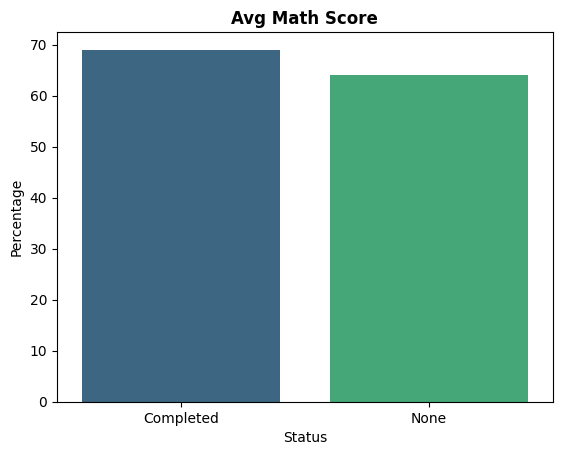

In [38]:
#Visualization for AVG Math Score

labels = ["Completed","None"]
sizes = [69,64]

# Create a bar plot
ax=sns.barplot(x=labels, y=sizes, palette='viridis')

plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Avg Math Score', color='black', fontweight='bold')
plt.show()

<ipython-input-39-a532f92ebfd3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y=sizes, palette='viridis')


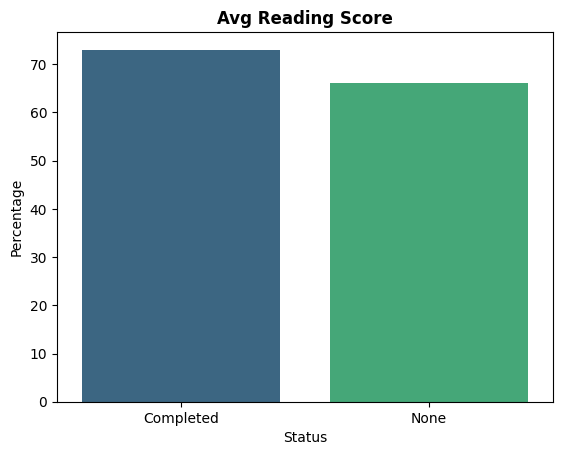

In [39]:
#Visualization for AVG Reading Score

labels = ["Completed","None"]
sizes = [73,66]

# Create a bar plot
ax=sns.barplot(x=labels, y=sizes, palette='viridis')

plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Avg Reading Score', color='black', fontweight='bold')
plt.show()

<ipython-input-40-6862ae6aea0f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=labels, y=sizes, palette='viridis')


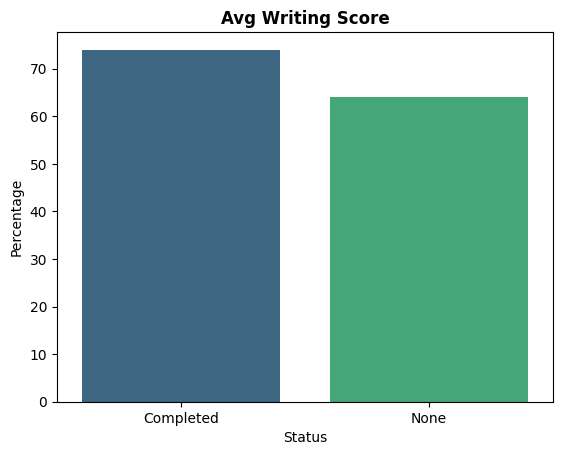

In [40]:
#Visualization for Writing Score

labels = ["Completed","None"]
sizes = [74,64]

# Create a bar plot
ax=sns.barplot(x=labels, y=sizes, palette='viridis')

plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Avg Writing Score', color='black', fontweight='bold')
plt.show()

Key highlight:


*   The average math score for students who took the preparation test is 69, while the average score for students who did not take the preparation test is 64.
*   The average reading score for students who took the preparation test is 73, while for students who did not take the preparation test, the average score is 66
* The average writing score for students who took the preparation test is 74, while for students who did not take the preparation test, the average score is 64.
*While the overall difference in average scores between students who took the preparation course and those who did not is relatively small, at least the test preparation course can minimize the likelihood of obtaining low exam scores.



##**4. Based on the average exam scores, which are not yet optimal?**

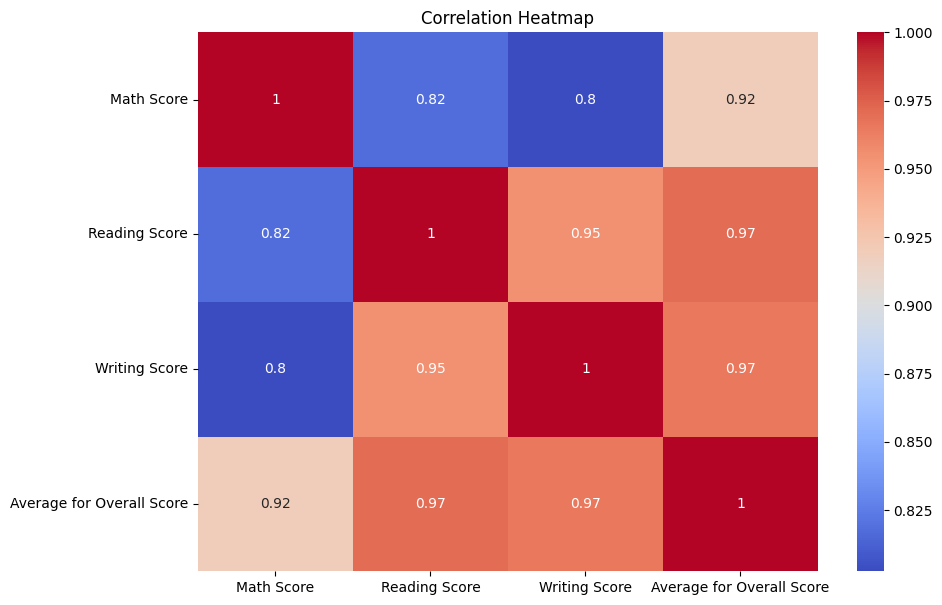

<ipython-input-41-7c36d743fd4f>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  table.corr()['Average for Overall Score'].sort_values(ascending=False)


Average for Overall Score    1.000000
Reading Score                0.970331
Writing Score                0.965669
Math Score                   0.918744
Name: Average for Overall Score, dtype: float64

In [41]:
corelation_matrix = table[['Math Score',
                          'Reading Score',
                          'Writing Score',
                          'Average for Overall Score']].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

table.corr()['Average for Overall Score'].sort_values(ascending=False)

Key highlight:


*   From the visualization, it can be seen that the Reading and Writing exam have scores of 0.97 and 0.96, respectively.
*   Math exam memiliki nilai hasil korelasi paling rendah yaitu sebesar 0,91. Hasil tersebut juga dapat disimpulkan bahwa Math subject memiliki pengaruh yang rendah terhadap variabel Average of Overall Score.
* The Math subject has the lowest correlation value, which is 0.91. This result suggests that the Math exam has a low influence on the Average of Overall Score variable.




##**Summary from overall analysis**


*   From the three exams taken by students, only 45% of students passed out to 1000 participants who took the exam. Upon further examination using score classification, only 52 students received an average grade of A, grade B was only held by 146 students, and 256 students received grade C. The reason for the GPA score being far from expectations is that the Reading, Writing, and Math exams have average scores ranging from 66 to 69 points. From the calculations, it can be seen that only the Reading Score achieved a proficiency rate above 50%.

*   When looking at the average scores based on groups, group E has the highest average exam score with an average of 72. This is followed by group D in second place with an average of 69, while group A ranks last with the smallest average score of 62. Furthermore, the analysis of average scores based on parental education background shows that all six graphs (master’s, bachelor’s, associate’s, some college, some high school, and high school) have stable values ranging from 63% to 70%. Parents with a master’s degree have the highest percentage at 70%, while the lowest is high school with a percentage of 63%. From the visualization, it can also be concluded that students with parents who have master’s and bachelor’s degrees, although they have a small percentage composition but they are able to outperform students with other parental education backgrounds.

* When the overall average score is calculated based on the test preparation course variable, it can be concluded that the test preparation course does not have a significant effect on the average final scores for students scoring ≥70. However, for final scores <70, most students who did not take the preparation course performed worse. Thus, the test preparation course is very useful in minimizing poor final scores for students. Additionally, when looking at the analysis of the test preparation course based on the three exams, the difference in scores between students who took the preparation course and those who did not is relatively small. At least, the test preparation course can minimize the likelihood of obtaining low exam scores.

* From the analysis, it was found that the Average for Overall Score is most influenced by the Reading and Writing exams. Meanwhile, the Math exam has the lowest correlation value, which is 0.91, with the Average of Overall Score.



##**Recommendation from the analysis**
From the analysis conducted, I conclude three recommendations that can be implemented to improve exam scores in the future, that is:


*   **Optimizing the Test Preparation Course** → on the previous analysis showing a pass rate of only 45%, my suggestion is to optimizing the test preparation course program to help improve the average scores of each student, especially those who have below-average scores. Some action that can be made include requiring all students to take the pre-test course or mandating some students to take the pre-test course for those scoring ≤70.

*   **Focus on Math exam** → based on the average exam scores overall, which conclude that the average Math exam score is low, it is recommended to pay more attention by providing special training or guidance programs for students.

* **Pay attention to Parental Education Background** → the parental education background appears to have an influence on exam results. Therefore, it is important to provide additional support and guidance for students with lower parental education backgrounds.

